# Model-specific results

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import data_reader
import matplotlib.patches as mpatches
import os
import matplotlib.lines as mlines
###################################
%matplotlib inline
mpl.matplotlib_fname();

## Read model simulation outputs

In [3]:
csv_path = '../output/csv/'
# csv files variables- for better readability:
model_non_com_activity_traces= pd.read_csv(os.path.join(csv_path, 'non_com_activity_traces.txt'), sep=',')
model_com_activity_traces = pd.read_csv(os.path.join(csv_path, 'comactivity_traces.txt'), sep=',')
model_uncertainty_vs_coherence= pd.read_csv(os.path.join(csv_path, 'uncertainty_vs_coherence.txt'), sep=',')
model_uncertainty_vs_coherence_com = pd.read_csv(os.path.join(csv_path, 'uncertainty_vs_coherence_com.txt'), sep=',')
model_uncertainty_vs_IT = pd.read_csv(os.path.join(csv_path, 'uncertainty_IT_correlation.txt'), sep=',')
model_uncertainty_tertiles = pd.read_csv(os.path.join(csv_path, 'model_tertiles_uncertainty.txt'), sep=',')

### Set this to a custom path if you want to save figures elsewhere

In [4]:
global save_path
save_path= '../output/figures/'

### Model architecture

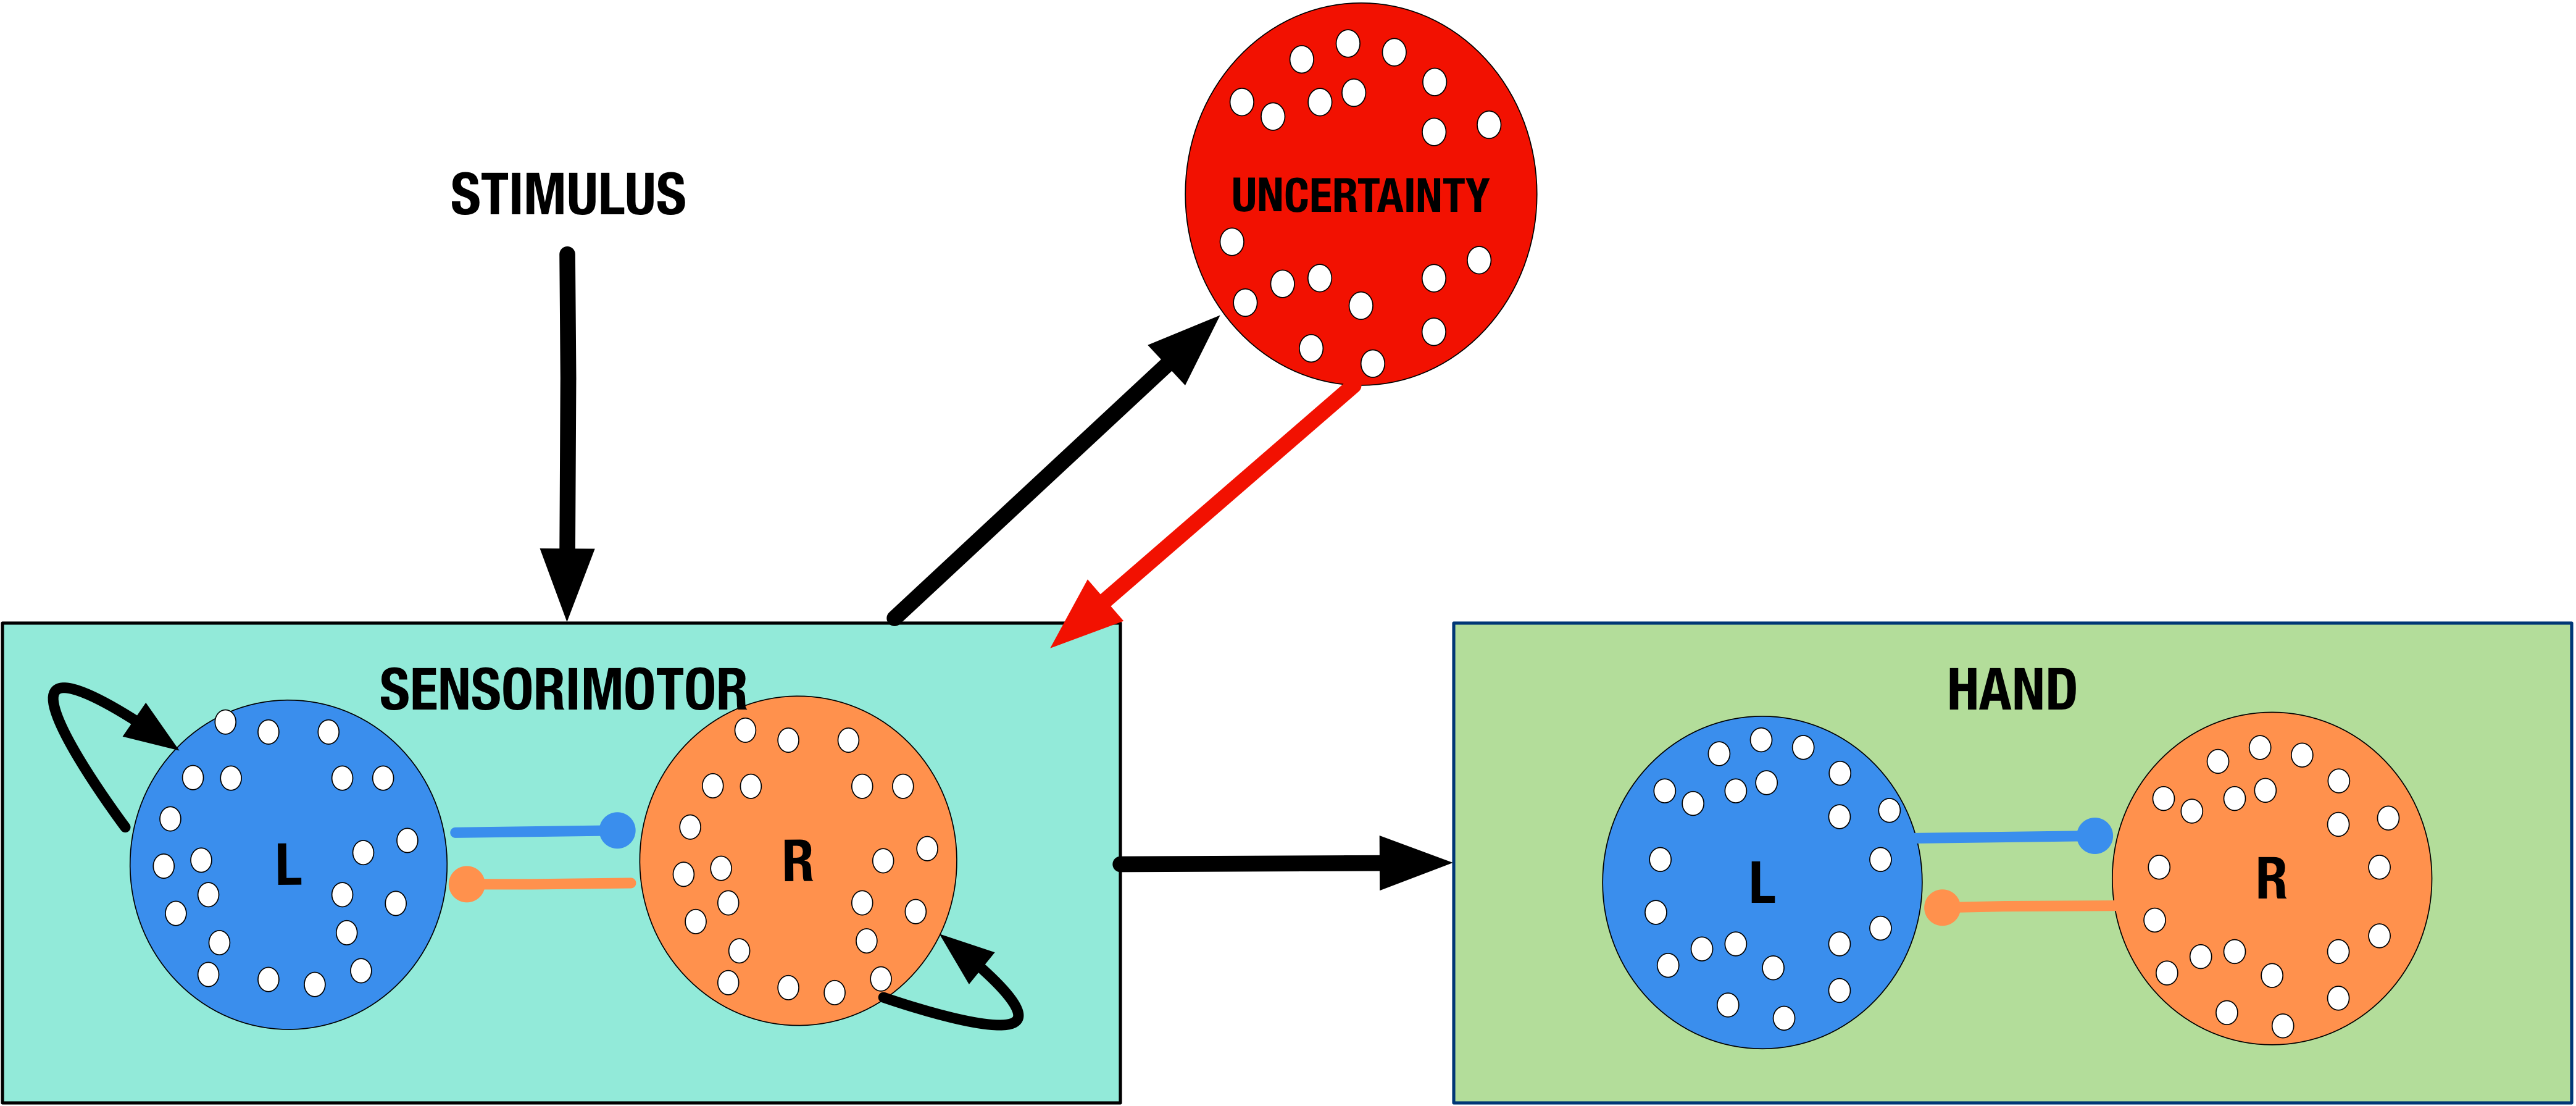

In [4]:
from IPython.display import Image
Image(filename='../output/figures/eye_hand_model_horizontal.png')

## Function to plot neural activities

In [16]:
def plot_mean_timecourse(ax, activity_traces, activity_type, start, stop, 
                         step, step_multiplier, ticks): 
    times = np.linspace(0,4000,4000)
    
    plt.tight_layout()
    
    if (activity_type=='non-CoM'):
        sensorimotor_left_weak = activity_traces.y_1[::2].copy()
        sensorimotor_right_weak = activity_traces.y_2[::2].copy()
        sensorimotor_left_strong = activity_traces.y_1_25[::2].copy()
        sensorimotor_right_strong = activity_traces.y_2_25[::2].copy()

        uncertainty_weak = activity_traces.y_mc_hu[::2].copy()
        uncertainty_strong = activity_traces.y_mc_hu_25[::2].copy()

        hand_left_weak = activity_traces.y_5[::2].copy()
        hand_right_weak = activity_traces.y_6[::2].copy()
        hand_left_strong = activity_traces.y_5_25[::2].copy()
        hand_right_strong = activity_traces.y_6_25[::2].copy()
        
    elif (activity_type=='CoM'):
        sensorimotor_left_weak = activity_traces.y_1_25[::2].copy()
        sensorimotor_right_weak = activity_traces.y_2_25[::2].copy()
        
        uncertainty_weak = activity_traces.y_mc_hu_25[::2].copy()
        
        hand_left_weak = activity_traces.y_5_25[::2].copy()
        hand_right_weak = activity_traces.y_6_25[::2].copy()
        
    left_color = '#054793'
    right_color = '#F19259'
    uncertainty_color = '#F16675'
    
    linewidth = 2
    
    ax[0].set_title(activity_type)
    
    ax[0].plot(times[start:stop:step], sensorimotor_left_weak[start:stop:step], lw=linewidth,
                      label='Left, 0.032', color=left_color, linestyle='-')
    ax[0].plot(times[start:stop:step], sensorimotor_right_weak[start:stop:step], lw=linewidth,
                      label='Right, 0.032', color=right_color, linestyle='-')
    
    ax[1].plot(times[start:stop:step], uncertainty_weak[start:stop:step], lw=linewidth,
                      label= '0.032', color=uncertainty_color, linestyle='-')
    
    ax[2].plot(times[start:stop:step], hand_left_weak[start:stop:step], lw=linewidth,
               color=left_color, linestyle='-', label='Left, 0.032')
    ax[2].plot(times[start:stop:step], hand_right_weak[start:stop:step], lw=linewidth,
               color=right_color, linestyle='-', label='Right, 0.032')

    if (activity_type=='non-CoM'):
        ax[0].plot(times[start:stop:step], sensorimotor_left_strong[start:stop:step], lw=linewidth,
                          label='Left, 0.256', color=left_color, linestyle='--')
        ax[0].plot(times[start:stop:step], sensorimotor_right_strong[start:stop:step], lw=linewidth,
                          label='Right, 0.256', color=right_color,linestyle='--')
        ax[1].plot(times[start:stop:step], uncertainty_strong[start:stop:step], lw=linewidth,
                          label='0.256', color=uncertainty_color, linestyle='--')    
        ax[2].plot(times[start:stop:step], hand_left_strong[start:stop:step], lw=linewidth,
               color=left_color, linestyle='--', label='Left, 0.256')
        ax[2].plot(times[start:stop:step], hand_right_strong[start:stop:step], lw=linewidth,
               color=right_color, linestyle='--', label='Right, 0.256')   

    
    fig.text(0.5, -0.05, 'Time (ms)', ha='center',fontsize=18)
    fig.text(-0.04, 0.5,'Firing rate (Hz)', va='center', rotation='vertical',fontsize=18)
    plt.xticks(np.arange(start,stop,step * step_multiplier), ticks)
    
    for axes in ax:
        axes.legend().set_visible(False)
    return ax

### On one plot

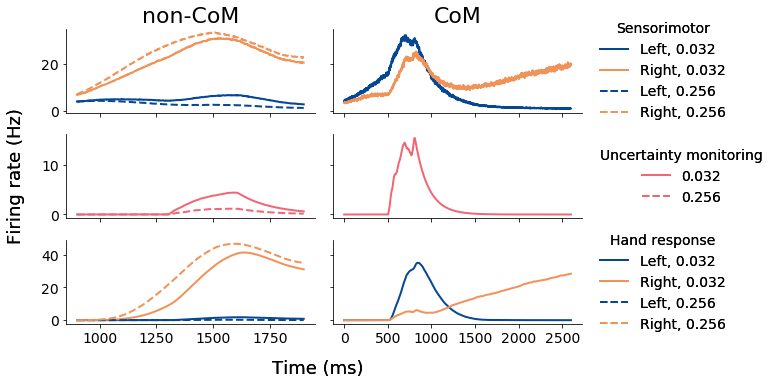

In [17]:
fig, axes = plt.subplots(3, 2, sharex='col', sharey='row', figsize=(8,5))
axes_left = axes.T[0]
axes_right = axes.T[1]
plot_mean_timecourse(axes_left, model_non_com_activity_traces, 'non-CoM', start=900,
                     stop=1900, step=1, step_multiplier=100, ticks=np.arange(0, 1000, 100))

plot_mean_timecourse(axes_right, model_com_activity_traces, 'CoM', start=800,
                     stop=3400, step=1, step_multiplier=500, ticks=np.arange(0, 2600, 500))

lines_row_1 = axes_left[0].get_lines()
legend_1 = axes_right[0].legend(lines_row_1, [line.get_label() for line in lines_row_1],
                                title='Sensorimotor', loc='center left', bbox_to_anchor= (1.05, 0.5), ncol=1, 
                                borderaxespad=0, frameon=False, fontsize=14, title_fontsize=14)

lines_row_2 = axes_left[1].get_lines()
legend_2 = axes_right[1].legend(lines_row_2, [line.get_label() for line in lines_row_2],
                                title='Uncertainty monitoring', loc='center left', bbox_to_anchor= (1.05, 0.5), ncol=1, 
                                borderaxespad=0, frameon=False, fontsize=14, title_fontsize=14)

lines_row_3 = axes_left[2].get_lines()
legend_3 = axes_right[2].legend(lines_row_3, [line.get_label() for line in lines_row_3],
                                title='Hand response', loc='center left', bbox_to_anchor= (1.05, 0.5), ncol=1, 
                                borderaxespad=0, frameon=False, fontsize=14, title_fontsize=14)

fig.add_artist(legend_1)
fig.add_artist(legend_2)
fig.add_artist(legend_3)

plt.savefig(os.path.join(save_path, 'model_activity.png'), bbox_inches='tight')

### On separate plots

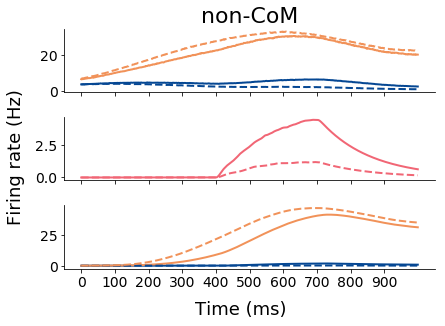

In [18]:
start = 900
stop = 1900
step = 1
step_multiplier = 100
ticks =  ('0', '100', '200', '300', 
              '400', '500', '600', '700', '800', '900')

fig, axes = plt.subplots(3, 1,sharex=True, sharey=False)
plot_mean_timecourse(axes, model_non_com_activity_traces, 'non-CoM', start,
                     stop, step, step_multiplier,ticks)

plt.savefig(os.path.join(save_path, 'model_activity_non_com.png'), bbox_inches='tight')

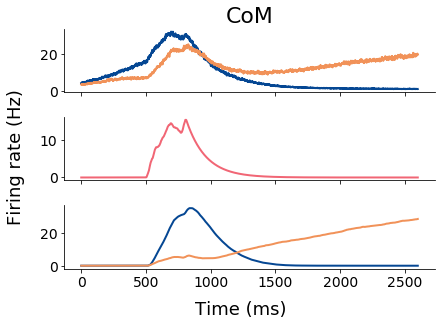

In [19]:
start = 800
stop =  3400
ticks = ('0', '500', '1000',
         '1500', '2000', '2500')
step_multiplier = 500

fig, axes = plt.subplots(3, 1,sharex=True, sharey=False)
plot_mean_timecourse(axes, model_com_activity_traces, 'CoM', start,
                     stop, step, step_multiplier, ticks)

plt.savefig(os.path.join(save_path, 'model_activity_com.png'), bbox_inches='tight')

## Function to plot uncertainty measurements

In [15]:
def plot_uncertainty(uncertainty, var):
    global save_path
    local_save_path = save_path
    
    fig = plt.figure()
    ax  = fig.gca()
    
    label_1 = 'CoM'
    label_2 = 'non-CoM'
    color_1 = 'grey'
    color_2 = 'black'
    marker_1 = 'o'
    marker_2 = 'o'
    x = range(5)
    plt.xticks(range(5), ('0', '0.032', '0.064', '0.128', '0.256'))
    
    if(var == 'all_correct_error'):
        label_1 = 'Correct'
        label_2 = 'Error'
        color_1 = 'C0'
        color_2 = 'C1'
        marker_1 = 'o'
        marker_2 = 'x'
        x = range(6)
        plt.xticks(np.arange(6), ('0', '0.032', '0.064', '0.128', '0.256', '0.512'))
        
    correct= ax.errorbar(x=x, y=uncertainty.x_correct, yerr=uncertainty.x_correct_sem,
                         color=color_1, label=label_1, fmt='-o', marker=marker_1, markersize=10)
    error = ax.errorbar(x=x, y=uncertainty.x_error, yerr=uncertainty.x_error_sem,
                        color=color_2, label=label_2, fmt='-o', marker=marker_2, markersize=10)
    
    ax.legend(handles=[correct, error], frameon=True)
    ax.set_xlabel('Coherence')
    ax.set_ylabel('Uncertainty ' + r'$\upsilon$' + '(%)')
    sns.despine(ax=ax, trim=True, offset=5)
    
    plt.savefig(os.path.join(local_save_path, 'uncertainty_vs_' + var.lower() + '.png'), bbox_inches='tight')

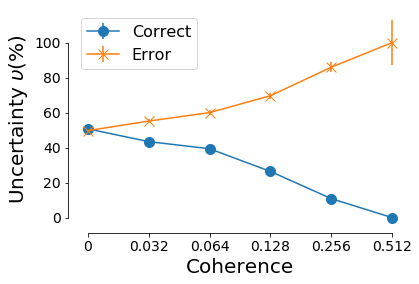

In [16]:
plot_uncertainty(model_uncertainty_vs_coherence, 'all_correct_error')

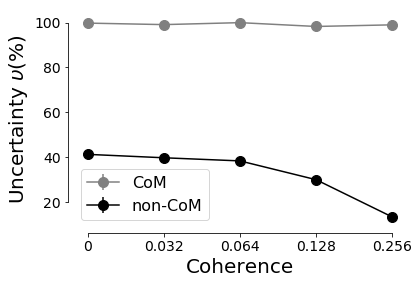

In [17]:
plot_uncertainty(model_uncertainty_vs_coherence_com, 'com')

In [23]:
def plot_uncertainty_IT(uncertainty_IT_correlation):
    from scipy.stats import linregress
    global save_path
    local_save_path = save_path
    
    fig = plt.figure()
    ax  = fig.gca() 

    X = uncertainty_IT_correlation.uncertainty
    Y = uncertainty_IT_correlation.IT
    
    ax.scatter(x=X, y=Y, color='C0', label= 'trials')
    fit = linregress(X,Y)

    ax.plot(X, fit.intercept + fit.slope*X, 'C1', label='linear fit')
    
    rvalue= fit.rvalue
    rvalue_string = f"{rvalue:.2f}"
    ax.set_title('$R^2$ = ' + rvalue_string)
    
    ax.set_xlabel('Normalised uncertainty')
    ax.set_ylabel('RT')
    
    plt.legend()
    sns.despine(ax=ax, trim=True, offset=5)
    ax.set_ylim((0.955, 1))
    
    plt.savefig(os.path.join(local_save_path, 'uncertainty_vs_IT.png'), bbox_inches='tight')

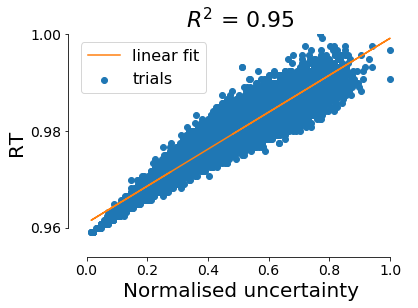

In [24]:
plot_uncertainty_IT(model_uncertainty_vs_IT)

In [5]:
def get_p_com_per_var(c, var):
    return np.array([(len(c[(c.is_com) & (c.coherence==coherence) & (c[var]==var_level)]) / 
                   len(c[(c.coherence==coherence)])) 
               if len(c[(c.coherence==coherence) & (c[var]==var_level)]) else np.NaN  
           for coherence in np.sort(c.coherence.unique())
           for var_level in np.sort(c[var].unique())])
    
def get_ci_vs_var(choices, var, n_threshold=0):
    p_com = get_p_com_per_var(choices, var)    

    n = choices.groupby(by=['coherence', var]).apply(len)
    ci = pd.DataFrame(p_com, columns=['p_com'], 
                        index=pd.MultiIndex.from_product([np.sort(choices.coherence.unique()), 
                                                          np.sort(choices[var].unique())], 
                                                         names=['coherence', var]))
    ci['ci_l'] = ci['p_com'] - np.sqrt(p_com*(1-p_com)/n)
    ci['ci_r'] = ci['p_com'] + np.sqrt(p_com*(1-p_com)/n)

    return ci.reset_index()
    
def plot_p_com_vs_var_ci(data, var, title, palette='viridis_r', n_threshold=0):
    global save_path
    local_save_path = save_path
    
    plt.figure()
    # this is needed to convert eye IT tertile from float to int
    data[var] = data[var].astype(int)
    
    ci = get_ci_vs_var(data, var, n_threshold=n_threshold)

    ax = sns.pointplot(data=ci, x='coherence', y='p_com', hue=var, palette=palette)
    
    ax.legend(fontsize=13, title_fontsize=13, title='Uncertainty tertile')  
    
    ax.set_ylim(-0.005, 0.05)
    ax.set_ylabel('p(CoM)')
    sns.despine(ax=ax, trim=True, offset=5)
    
    local_save_path = local_save_path + var + '_' + title.lower().replace(" ", "_") + '.png'
    plt.savefig(local_save_path, bbox_inches='tight')

    return ax

In [6]:
# pd.qcut assumes equal bin sizes- workaround in this function below:
def pct_rank_qcut(series, n):
    edges = pd.Series([float(i) / n for i in range(n + 1)])
    f = lambda x: (edges >= x).argmax()
    return series.rank(pct=1).apply(f)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  after removing the cwd from sys.path.


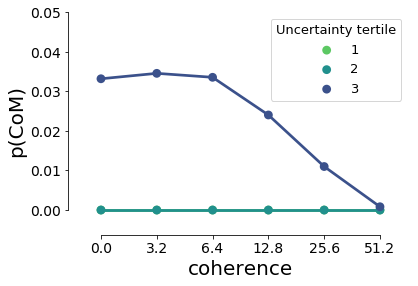

In [7]:
# AZ: something is wrong here, I can only run this block once, for every subsequent run I get an error when ci is calculated
model_uncertainty_tertiles['uncertainty_tertile'] =\
pct_rank_qcut(model_uncertainty_tertiles['uncertainty'], 3)
model_uncertainty_tertiles['is_com'] = model_uncertainty_tertiles['is_com'].astype('bool')
plot_p_com_vs_var_ci(model_uncertainty_tertiles, 'uncertainty_tertile', 'Model', n_threshold=10)

In [14]:
# AZ: found a prettier workaround here: https://stackoverflow.com/questions/20158597/how-to-qcut-with-non-unique-bin-edges
# but this doesn't work, we have to check later what's the problem here:))) 

# model_uncertainty_tertiles['uncertainty_tertile'] =\
#     pd.qcut(model_uncertainty_tertiles['uncertainty'].rank(method='first'), 3, labels=[1,2,3]).astype(int)
# model_uncertainty_tertiles['is_com'] = model_uncertainty_tertiles['is_com'].astype('bool')
# plot_p_com_vs_var_ci(model_uncertainty_tertiles, 'uncertainty_tertile', 'Model', n_threshold=10)